# WIP-Prototype: lambda

| Properties      | Data    |
|---------------|-----------|
| *Labels* | `['BENIGN', 'DDoS']` |
| *Normalization* | `Min-Max` |
| *Sample Size* | `5.000`|
| *Adversarial Attack* | `FGSM` |
| *Explanations* | `SHAP` |
| *Detector* | `Detect correct BENIGN Samples with Autoencoder` |


---

## *Has to be run first alone!*

In [1]:
# To import modules from the functions directory
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

## Data Preprocessing

In [26]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

encoding_type = 0 # binary encoding
norm_type = 0 # min-max normalization
label_names = ['BENIGN', 'DDoS'] # labels to include
sample_size = 1000 # sample size for each label -> 2 x sample_size = total samples

dataset = dp.build_dataset(label_names)

normalizer, zero_columns = dp.generate_normalizer(dataset, norm_type)

feature_df, label_df, used_indices = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=sample_size, random_sample_state=42)
print(f"Generate Features | Indices: {feature_df.index[:5]}... | Shape: {feature_df.shape}")
print(f"Generate Labels | Indices: {label_df.index[:5]}... | Shape: {label_df.shape}")
print(label_df.value_counts()) # -> will first show [0, 1] then [1, 0] if label number is equal

-- Building CICIDS2017 dataset --
--- Combining all CICIDS2017 files ---
Wednesday-workingHours.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
--- Removing NaN and Infinity values ---
Removing 1358 Rows with NaN values
Removing 1509 Rows with Infinity values
--- Extracting labels ---
 Label
BENIGN    2271320
DDoS       128025
Name: count, dtype: int64
-- Generating normalizer --
--- Splitting labels and features ---
Zero Columns: [' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (2000, 79)
--- Splittin

## Split Data

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1600, 70) (400, 70) (1600, 2) (400, 2)


## Create IDS

In [42]:
import functions.intrusion_detection_system as ids
import importlib
importlib.reload(ids)

# TODO: build ids with complete dataset
# build ids and evaluate it on test data
ids_model = ids.build_intrusion_detection_system(X_train, y_train, X_test, y_test)
# store prediction from X_train
y_pred = ids.predict(ids_model, X_train, columns=y_train.columns)
print(f"Predictions on Normal Data | Indices: {y_pred.index[:5]}... | Shape: {y_pred.shape}")

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6758 - loss: 0.6652 - val_accuracy: 0.8375 - val_loss: 0.6313
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8486 - loss: 0.6037 - val_accuracy: 0.8313 - val_loss: 0.5662
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8732 - loss: 0.5251 - val_accuracy: 0.9000 - val_loss: 0.4808
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9270 - loss: 0.4326 - val_accuracy: 0.9406 - val_loss: 0.3841
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9589 - loss: 0.3335 - val_accuracy: 0.9656 - val_loss: 0.2842
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9747 - loss: 0.2391 - val_accuracy: 0.9656 - val_loss: 0.1994
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9757 - loss: 0.1603 - val_accuracy: 0.9656 - val_loss: 0.1445
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9797 - loss: 0.1101 - val_accuracy: 0.9656 - val_loss

## Test: Autoencoder

In [ ]:
# from keras.models import Model
# from keras.layers import Input, Dense

# def build_deep_autoencoder(input_dim):
#     # Encoder
#     input_layer = Input(shape=(input_dim,))
#     encoded = Dense(200, activation="relu")(input_layer)
#     encoded = Dense(100, activation="relu")(encoded)
#     encoded = Dense(50, activation="relu")(encoded)
#     bottleneck = Dense(32, activation="relu")(encoded)  # Bottleneck (smallest representation)

#     # Decoder
#     decoded = Dense(50, activation="relu")(bottleneck)
#     decoded = Dense(100, activation="relu")(decoded)
#     decoded = Dense(200, activation="relu")(decoded)
#     output_layer = Dense(input_dim, activation="sigmoid")(decoded)  # Must match input shape

#     # Create model
#     autoencoder = Model(input_layer, output_layer)
#     autoencoder.compile(optimizer="adam", loss="mse")

#     return autoencoder

In [29]:
# import numpy as np

# benign_indices = y_train[y_train['BENIGN'] == 1].index

# X_train_autoencoder = X_train.loc[benign_indices]

# # Define input size
# input_dim = X_train_autoencoder.shape[1]  # Number of features
# encoding_dim = 50  # Size of the compressed representation

# # Create the model
# autoencoder = build_deep_autoencoder(input_dim)

# # Compile the model
# autoencoder.compile(optimizer="adam", loss="mse")

# history = autoencoder.fit(X_train_autoencoder, X_train_autoencoder,  # Input = Output
#                           epochs=10, batch_size=100, 
#                           validation_split=0.1, verbose=1)



In [30]:
# reconstructed = autoencoder.predict(X_test)

# # Compute reconstruction error (mean absolute error)
# reconstruction_errors = np.mean(np.abs(reconstructed - X_test), axis=1)

# # Set threshold: mean + 2*std of training reconstruction errors
# threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors)

# # Mark samples as adversarial if their reconstruction error is above threshold
# y_pred = (reconstruction_errors < threshold).astype(int)  # 1 = adversarial, 0 = normal

# print(f"threshold: {threshold}")
# print(f"Reconstruction Errors | Indices: {reconstruction_errors[:5]}... | Shape: {reconstruction_errors.shape}")
# print(f"Labels: {y_test.iloc[:5]}... | Shape: {y_test.shape}")
# print(f"Predictions: {y_pred[:5]}... | Shape: {y_pred.shape}")

# print(y_pred[y_pred == 1].shape)
# print(y_pred[y_pred == 0].shape)

# from sklearn.metrics import classification_report, accuracy_score
# y_test_binary = np.array(y_test).argmin(axis=1)
# print("Accuracy:", accuracy_score(y_test_binary, y_pred))

(801, 70)
(799, 70)
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2297 - val_loss: 0.2105
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1998 - val_loss: 0.1546
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1358 - val_loss: 0.0700
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0571 - val_loss: 0.0235
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0235 - val_loss: 0.0176
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0197 - val_loss: 0.0171
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0190 - val_loss: 0.0167
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 - val_loss: 0.0166
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0188 - val_loss: 0.0166
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0186 - val_loss: 0.0162
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Anomaly Detection Accuracy: 0.5175
Confusion Matrix:
 [[ 14 187]
 [  6 193]]


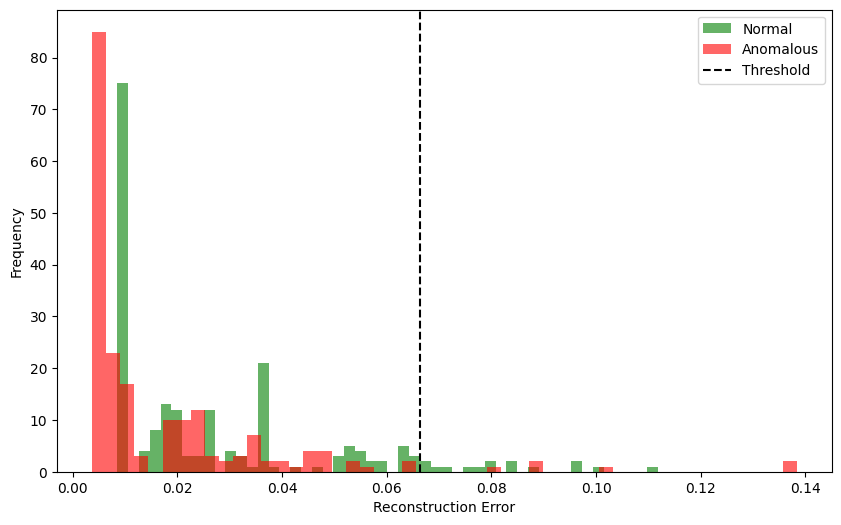

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



# Use only normal data for training
X_train_normal = X_train.loc[y_train['BENIGN'] == 1]
X_train_attack = X_train.loc[y_train['ATTACK'] == 1]
print(X_train_normal.shape)
print(X_train_attack.shape)

# Define the deep autoencoder
input_data = layers.Input(shape=(X_train.shape[1],))

# Encoder
x = layers.Dense(128, activation='relu')(input_data)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)  # Latent space (compressed representation)

# Decoder
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
decoded_output = layers.Dense(X_train.shape[1], activation='sigmoid')(x)

# Autoencoder model
autoencoder = models.Model(input_data, decoded_output)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder only on normal data
autoencoder.fit(X_train_normal, X_train_normal, epochs=10, batch_size=128, validation_split=0.1)

# Get the reconstruction error on the test data
reconstructed_X_test = autoencoder.predict(X_test)

# Calculate the reconstruction error (Mean Squared Error)
mse = np.mean(np.square(X_test - reconstructed_X_test), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # Threshold at the 95th percentile

# Detect anomalies based on the threshold
y_pred = (mse <= threshold).astype(int)

y_test_binary = np.array(y_test).argmin(axis=1)
# Evaluate the results
from sklearn.metrics import accuracy_score, confusion_matrix
print("Anomaly Detection Accuracy:", accuracy_score(y_test_binary, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred))

# Visualize the reconstruction error for normal and anomalous data
plt.figure(figsize=(10, 6))
plt.hist(mse[y_test_binary == 0], bins=50, alpha=0.6, color='g', label='Normal')
plt.hist(mse[y_test_binary == 1], bins=50, alpha=0.6, color='r', label='Anomalous')
plt.axvline(x=threshold, color='k', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Generate C&W and FGSM Attacks

In [43]:
import functions.attack_generator as ag
import importlib
import numpy as np
importlib.reload(ag)

all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, all_features) # TODO: use all features for generating art model

import multiprocessing
num_cores = multiprocessing.cpu_count()

# generate attacks on the training data
X_adv = ag.generate_fgsm_attacks(art_model, X_train, 1)
print(f"Create Adversarial Attack | Indices: {X_adv.index[:5]}... | Shape: {X_adv.shape}")

y_pred_adv = ag.evaluate_art_model(art_model, X_adv, y_train)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv.index[:5]}... | Shape: {y_pred_adv.shape}")

Adversarial FGSM examples generated. Shape: (1600, 70)
Create Adversarial Attack | Indices: Index([1492843, 500254, 990011, 1220379, 1099329], dtype='int64')... | Shape: (1600, 70)
Accuracy: 58.25%
              precision    recall  f1-score   support

      ATTACK       1.00      0.16      0.28       799
      BENIGN       0.55      1.00      0.71       801

    accuracy                           0.58      1600
   macro avg       0.77      0.58      0.49      1600
weighted avg       0.77      0.58      0.49      1600

Confusion Matrix: Positive == BENIGN
TN: 131, FP: 668, FN: 0, TP: 801
Predictions on Adversarial Attacks | Indices: Index([1492843, 500254, 990011, 1220379, 1099329], dtype='int64')... | Shape: (1600, 2)


In [44]:
# find correctly classified samples
benign_indices = y_train[y_train['BENIGN'] == 1].index
print(f"Correct Benign Samples: {len(benign_indices)}")
benign_adv_predicted_indices = y_pred[y_pred['BENIGN'] == 1].index
print(f"    Predicted Benign Samples on Normal Data: {len(benign_adv_predicted_indices)}")
benign_predicted_adversarial_indices = y_pred_adv[y_pred_adv['BENIGN'] == 1].index
print(f"    Predicted Benign Samples on Adversarial Data: {len(benign_predicted_adversarial_indices)}")
attack_indices = y_train[y_train['ATTACK'] == 1].index
print(f"Correct Attack Samples: {len(attack_indices)}")
attack_adv_predicted_indices = y_pred[y_pred['ATTACK'] == 1].index
print(f"    Predicted Attack Samples on Normal Data: {len(attack_adv_predicted_indices)}")
attack_predicted_adversarial_indices = y_pred_adv[y_pred_adv['ATTACK'] == 1].index
print(f"    Predicted Attack Samples on Adversarial Data: {len(attack_predicted_adversarial_indices)}")
print("-----------------------------")
correctly_benign_classified_indices = benign_indices.intersection(benign_adv_predicted_indices)
print(f"Correctly classified as BENIGN from the IDS: {len(correctly_benign_classified_indices)} | Indices: {correctly_benign_classified_indices[:3]}")
misclassified_as_benign_due_attack_indices = attack_indices.intersection(attack_adv_predicted_indices).intersection(benign_predicted_adversarial_indices)
print(f"ATTACK sample misclassified as BENIGN due to adversarial attack: {len(misclassified_as_benign_due_attack_indices)} | Indices: {misclassified_as_benign_due_attack_indices[:3]}")

Correct Benign Samples: 801
    Predicted Benign Samples on Normal Data: 769
    Predicted Benign Samples on Adversarial Data: 1469
Correct Attack Samples: 799
    Predicted Attack Samples on Normal Data: 831
    Predicted Attack Samples on Adversarial Data: 131
-----------------------------
Correctly classified as BENIGN from the IDS: 768 | Indices: Index([1492843, 500254, 990011], dtype='int64')
ATTACK sample misclassified as BENIGN due to adversarial attack: 667 | Indices: Index([2657887, 2747758, 2687860], dtype='int64')


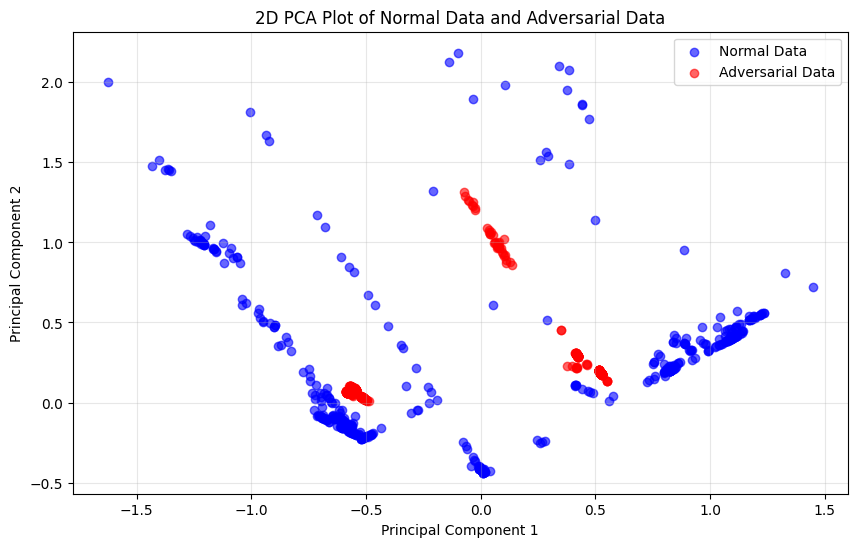

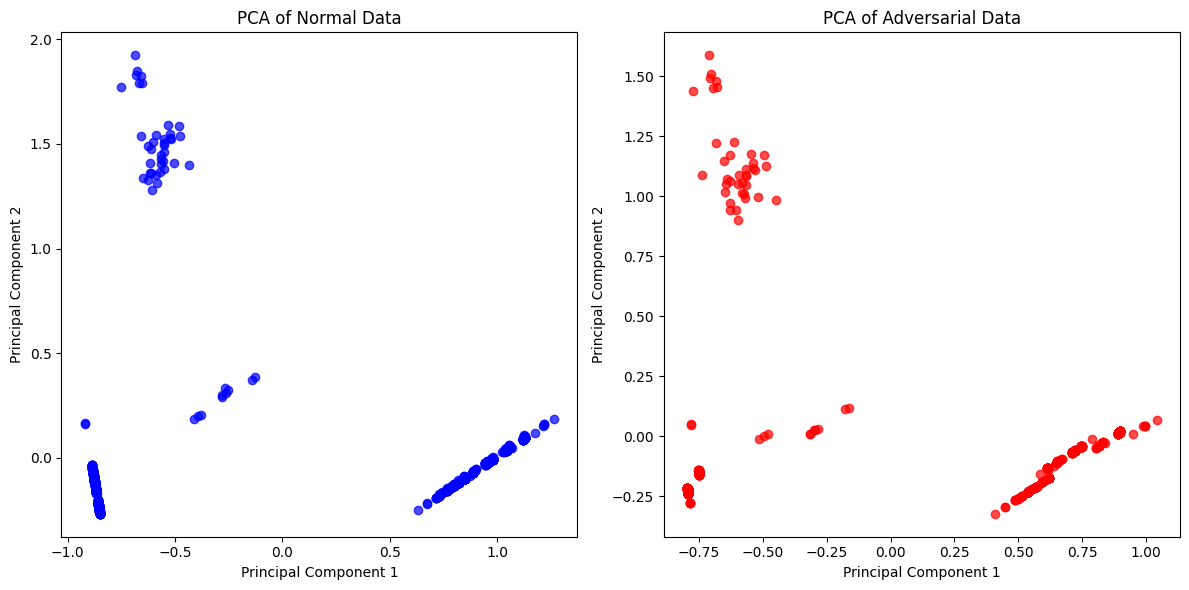

In [7]:
import functions.visualizer as visualizer
import importlib
importlib.reload(visualizer)

visualizer.visualize_data_distribution(X_train.loc[correctly_benign_classified_indices], 'Normal Data', X_adv.loc[misclassified_as_benign_due_attack_indices], 'Adversarial Data')
visualizer.pca_visualization_side_by_side(X_train.loc[misclassified_as_benign_due_attack_indices], 'Normal Data', X_adv.loc[misclassified_as_benign_due_attack_indices], 'Adversarial Data')

## Explainer

In [35]:
import functions.explainer as exp
import importlib
importlib.reload(exp)

explainer = exp.generate_shap_explainer(ids_model, X_train)

shap_values, shap_values_df = exp.generate_shap_values(explainer, X_train)
print(f"Generate Explanations | Indices: {shap_values_df.index[:5]}... | Shape: {shap_values_df.shape}")

shap_values_adv, shap_values_adv_df = exp.generate_shap_values(explainer, X_adv)
print(f"Generate Adversarial Explanations | Indices: {shap_values_adv_df.index[:5]}... | Shape: {shap_values_adv_df.shape}")

PermutationExplainer explainer: 1601it [01:55, 13.22it/s]                          


Generate Explanations | Indices: Index([1492843, 500254, 990011, 1220379, 1099329], dtype='int64')... | Shape: (1600, 70)


PermutationExplainer explainer: 1601it [01:41, 14.38it/s]                          


Generate Adversarial Explanations | Indices: Index([1492843, 500254, 990011, 1220379, 1099329], dtype='int64')... | Shape: (1600, 70)


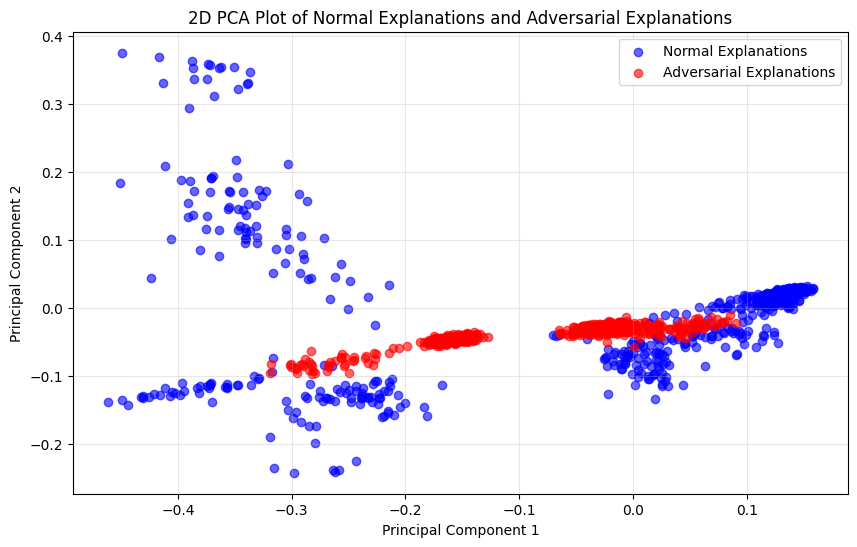

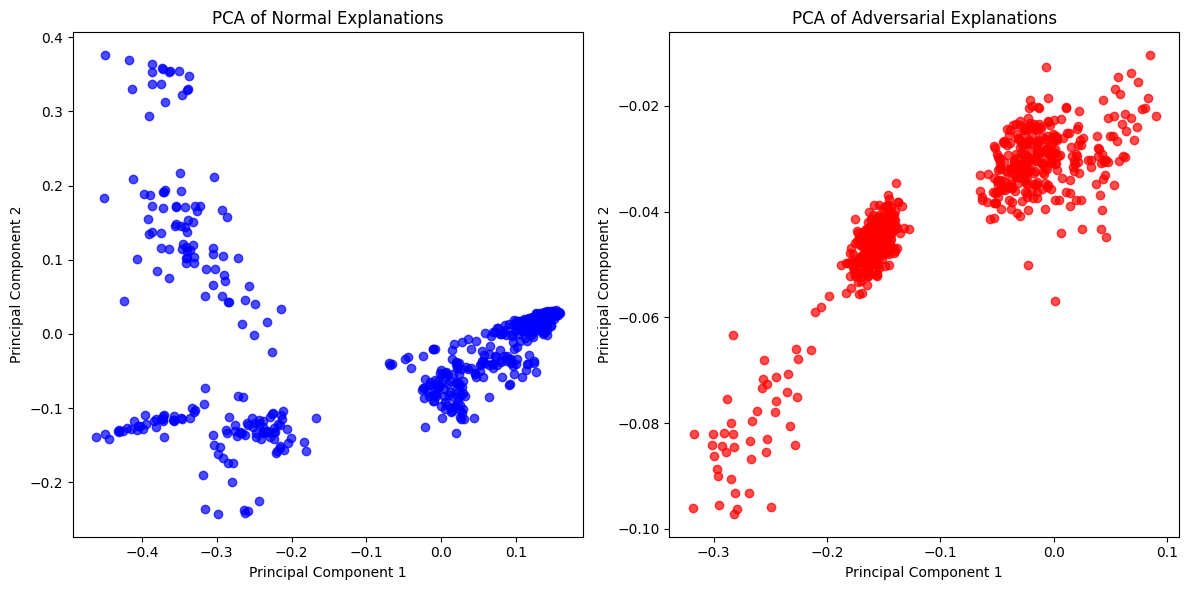

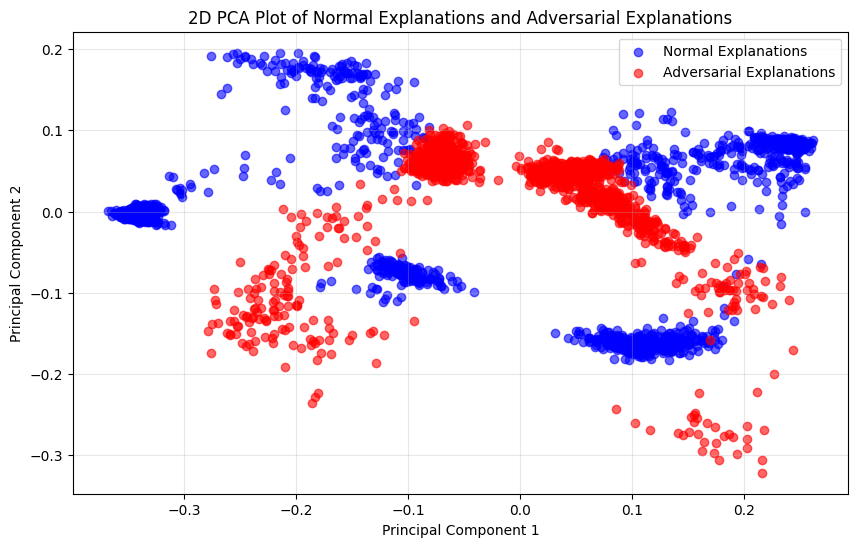

In [9]:
visualizer.visualize_data_distribution(shap_values_df.loc[correctly_benign_classified_indices], 'Normal Explanations', shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices], 'Adversarial Explanations')
visualizer.pca_visualization_side_by_side(shap_values_df.loc[correctly_benign_classified_indices], 'Normal Explanations', shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices], 'Adversarial Explanations')
visualizer.visualize_data_distribution(shap_values_df, 'Normal Explanations', shap_values_adv_df, 'Adversarial Explanations')

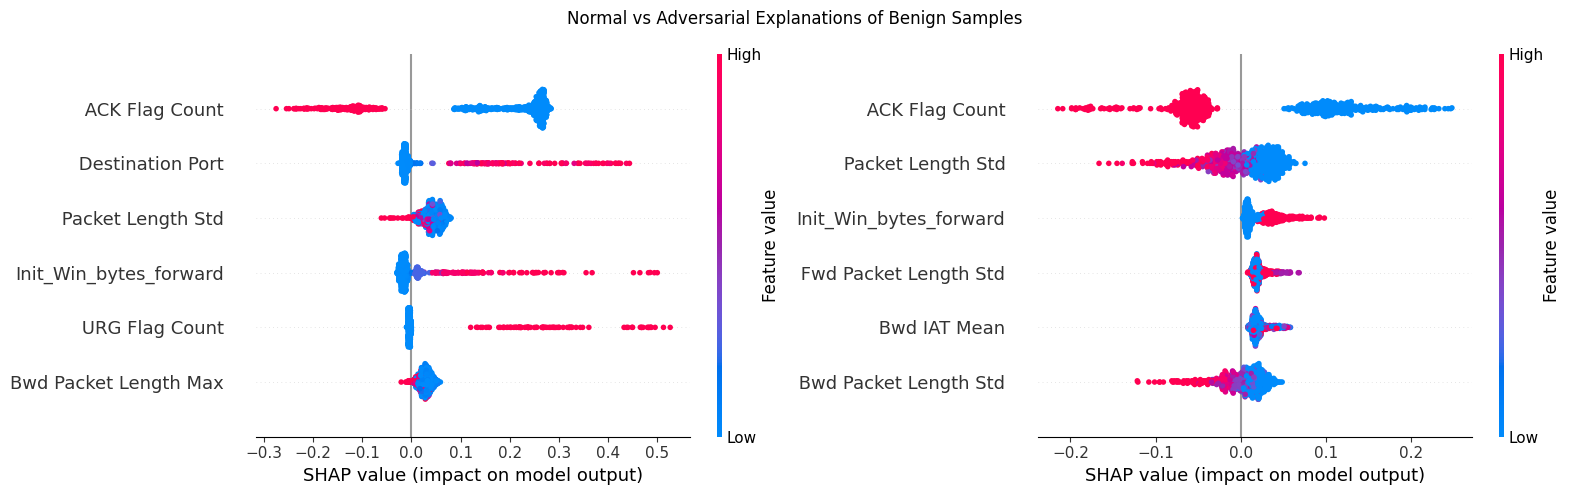

In [10]:
exp.plot_shap_summary_comparison(shap_values_df.loc[correctly_benign_classified_indices].values, X_train.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices].values, X_adv.loc[misclassified_as_benign_due_attack_indices], 6, title='Normal vs Adversarial Explanations of Benign Samples')

## Autoencoder

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2471 - val_loss: 0.2259
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2055 - val_loss: 0.0985
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0591 - val_loss: 0.0016
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - val_loss: 0.0011
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Anomaly Detection Accuracy: 0.489198606271777
Confusion Matrix:
 [[  3 664]
 [ 69 699]]


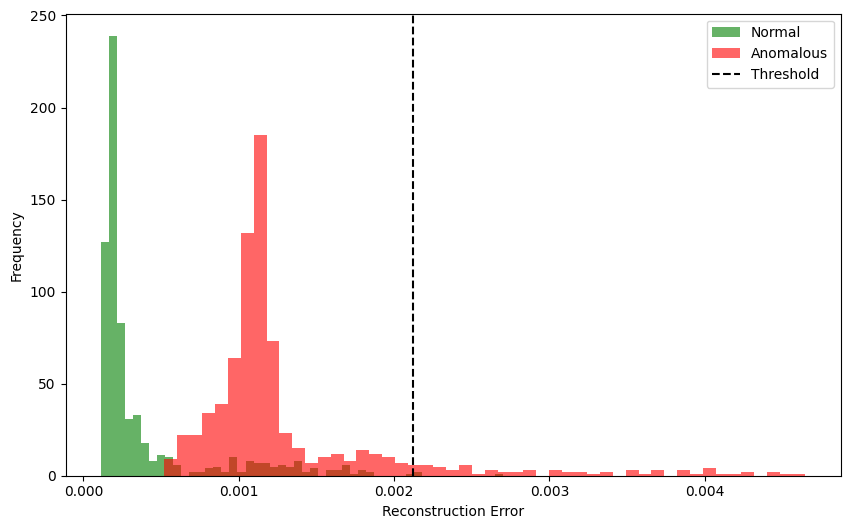

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import functions.detector as det
import importlib
importlib.reload(det)

X, y = det.build_train_datasets(shap_values_df.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices])

# Define the deep autoencoder
input_data = layers.Input(shape=(shap_values_df.shape[1],))

# Encoder
x = layers.Dense(128, activation='relu')(input_data)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)  # Latent space (compressed representation)

# Decoder
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
decoded_output = layers.Dense(shap_values_df.shape[1], activation='sigmoid')(x)

# Autoencoder model
autoencoder = models.Model(input_data, decoded_output)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder only on normal data
autoencoder.fit(shap_values_df, shap_values_df, epochs=10, batch_size=128, validation_split=0.1)

# Get the reconstruction error on the test data
reconstructed_X_test = autoencoder.predict(X)

# Calculate the reconstruction error (Mean Squared Error)
mse = np.mean(np.square(X - reconstructed_X_test), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # Threshold at the 95th percentile

# Detect anomalies based on the threshold
y_pred = (mse <= threshold).astype(int)

y_test_binary = np.array(y).argmin(axis=1)
# Evaluate the results
from sklearn.metrics import accuracy_score, confusion_matrix
print("Anomaly Detection Accuracy:", accuracy_score(y_test_binary, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred))

# Visualize the reconstruction error for normal and anomalous data
plt.figure(figsize=(10, 6))
plt.hist(mse[y_test_binary == 0], bins=50, alpha=0.6, color='g', label='Normal')
plt.hist(mse[y_test_binary == 1], bins=50, alpha=0.6, color='r', label='Anomalous')
plt.axvline(x=threshold, color='k', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/home/felix/Documents/Uni/Master Arbeit/Python/xai-assisted-intrusion-detection-system/.env/lib64/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 0: D Loss = 0.7298, G Loss = 0.6899
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 10: D Loss = 0.7028, G Loss = 0.6664
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 20: D Loss = 0.6948, G Loss = 0.6411
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/ste

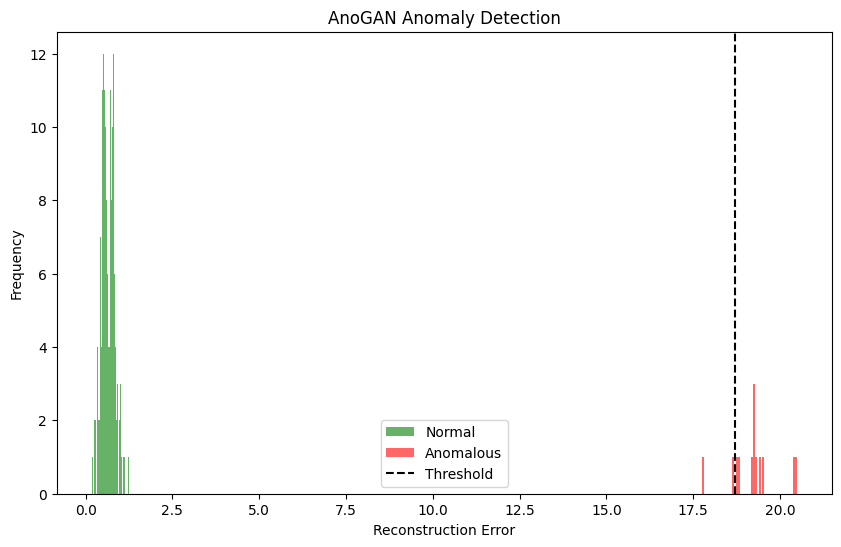

In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
normal_data = np.random.normal(loc=0, scale=1, size=(1000, 20))  # Normal samples
anomalies = np.random.normal(loc=10, scale=1, size=(50, 20))  # Anomalous samples

# Combine normal and anomalous data
X = np.vstack([normal_data, anomalies])
y = np.hstack([np.zeros(len(normal_data)), np.ones(len(anomalies))])  # 0 = Normal, 1 = Anomaly

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train GAN on only normal data
X_train_normal = X_train_scaled[y_train == 0]  # Only normal data

# Define Generator
latent_dim = 10
generator = models.Sequential([
    layers.Dense(32, activation="relu", input_shape=(latent_dim,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(20, activation="tanh")
])

# Define Discriminator
discriminator = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(20,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile Discriminator
discriminator.compile(optimizer="adam", loss="binary_crossentropy")

# Define GAN Model
discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer="adam", loss="binary_crossentropy")

# Train GAN
batch_size = 64
epochs = 100
for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, X_train_normal.shape[0], batch_size)
    real_samples = X_train_normal[idx]
    latent_samples = np.random.normal(size=(batch_size, latent_dim))
    fake_samples = generator.predict(latent_samples)
    
    X_combined = np.vstack((real_samples, fake_samples))
    y_combined = np.hstack((np.ones(batch_size), np.zeros(batch_size)))  # Real=1, Fake=0

    discriminator.trainable = True
    d_loss = discriminator.train_on_batch(X_combined, y_combined)

    # Train Generator
    latent_samples = np.random.normal(size=(batch_size, latent_dim))
    y_gan = np.ones(batch_size)  # Generator tries to fool discriminator (wants all labels to be 1)
    
    discriminator.trainable = False
    g_loss = gan.train_on_batch(latent_samples, y_gan)
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: D Loss = {d_loss:.4f}, G Loss = {g_loss:.4f}")

print("GAN training completed.")

# Compute reconstruction error on test set
def compute_anomaly_score(data):
    latent_samples = np.random.normal(size=(data.shape[0], latent_dim))
    generated_data = generator.predict(latent_samples)
    mse = np.mean(np.square(data - generated_data), axis=1)
    return mse

mse = compute_anomaly_score(X_test_scaled)

# Set threshold for anomaly detection (e.g., 95th percentile)
threshold = np.percentile(mse, 95)
y_pred = (mse > threshold).astype(int)

# Evaluate the results
from sklearn.metrics import accuracy_score, confusion_matrix
print("Anomaly Detection Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot reconstruction errors
plt.figure(figsize=(10, 6))
plt.hist(mse[y_test == 0], bins=50, alpha=0.6, color='g', label="Normal")
plt.hist(mse[y_test == 1], bins=50, alpha=0.6, color='r', label="Anomalous")
plt.axvline(x=threshold, color="k", linestyle="--", label="Threshold")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.title("AnoGAN Anomaly Detection")
plt.show()



## Detector

In [15]:
import functions.detector as det
import importlib
importlib.reload(det)

# build detector to detect adversarial samples that misclassify attack samples as benign

# create dataframe
# TODO: build detector with normal and adversarial shap values?
# TODO: build with shap_values_adv_df to detect 'BENIGN' and 'ATTACK'
import pandas as pd

# alternative approach: detector that predicts the original label of the sample for all given adversarial attacks
concat_correctly_benign_classified_shaps = pd.concat([shap_values_df.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[correctly_benign_classified_indices]], axis=0)
concat_misclassified_as_benign_shaps = pd.concat([shap_values_df.loc[misclassified_as_benign_due_attack_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices]], axis=0)
X, y = det.build_train_datasets(concat_correctly_benign_classified_shaps, concat_misclassified_as_benign_shaps)

#X, y = det.build_train_datasets(shap_values_df.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices])
print(X.shape, y.shape)

# split data
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)
print(X_train_det.shape, X_test_det.shape, y_train_det.shape, y_test_det.shape)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det)

(15712, 70) (15712, 2)
(14140, 70) (1572, 70) (14140, 2) (1572, 2)
Epoch 1/10


2025-03-21 10:51:20.497574: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7137 - loss: 0.6429 - val_accuracy: 0.8766 - val_loss: 0.3193
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9049 - loss: 0.2751 - val_accuracy: 0.9452 - val_loss: 0.1507
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9411 - loss: 0.1569 - val_accuracy: 0.9526 - val_loss: 0.1181
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9520 - loss: 0.1281 - val_accuracy: 0.9558 - val_loss: 0.1081
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9562 - loss: 0.1141 - val_accuracy: 0.9537 - val_loss: 0.1075
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9578 - loss: 0.1082 - val_accuracy: 0.9604 - val_loss: 0.0962
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1049 - val_accuracy: 0.9607 - val_loss: 0.0936
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9667 - loss: 0.0953 - val_accuracy: 0.9646 - val_

---
## Evaluation: Identify and Block Dangerous Adversarial Attacks

### Generate Dataset, Attacks and Explanations

In [16]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

# exclude previously used samples
dataset_eval_excluded = dataset.drop(index=used_indices)

X_eval, y_eval, used_eval_indices = dp.preprocess_data(dataset_eval_excluded, encoding_type, normalizer, zero_columns, sample_size=400, random_sample_state=27)
print(f"Generate Features | Indices: {X_eval.index[:5]}... | Shape: {X_eval.shape}")
print(f"Generate Labels | Indices: {y_eval.index[:5]}... | Shape: {y_eval.shape}")
print(y_eval.value_counts())

-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (800, 79)
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Normalizing features using MinMaxScaler ---
Generate Features | Indices: Index([2770660, 1750283, 583541, 1781162, 353609], dtype='int64')... | Shape: (800, 70)
Generate Labels | Indices: Index([2770660, 1750283, 583541, 1781162, 353609], dtype='int64')... | Shape: (800, 2)
BENIGN  ATTACK
False   True      400
True    False     400
Name: count, dtype: int64


In [ ]:
importlib.reload(ag)

X_adv_eval = ag.generate_fgsm_attacks(art_model, X_eval, target_label=1)
print(f"Create Adversarial Attack | Indices: {X_adv_eval.index[:5]}... | Shape: {X_adv_eval.shape}")

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_adv_eval, y_eval)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

Adversarial FGSM examples generated. Shape: (800, 70)
Create Adversarial Attack | Indices: Index([2770660, 1750283, 583541, 1781162, 353609], dtype='int64')... | Shape: (800, 70)
Accuracy: 50.50%
              precision    recall  f1-score   support

      BENIGN       1.00      0.01      0.02       400
      ATTACK       0.50      1.00      0.67       400

    accuracy                           0.51       800
   macro avg       0.75      0.51      0.34       800
weighted avg       0.75      0.51      0.34       800

Confusion Matrix: Positive == BENIGN
TN: 4, FP: 396, FN: 0, TP: 400
Predictions on Adversarial Attacks | Indices: Index([2770660, 1750283, 583541, 1781162, 353609], dtype='int64')... | Shape: (800, 2)


In [15]:
importlib.reload(exp)
X_eval_adv_shap_values, X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_eval)
# X_eval_shap_values, X_eval_shap_values_df = exp.generate_shap_values(explainer, X_eval)

print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

PermutationExplainer explainer: 801it [00:52, 12.28it/s]                         

Create Explanations | Indices: Index([2770660, 1750283, 583541, 1781162, 353609], dtype='int64')... | Shape: (800, 70)


### Split Data into BENIGN and ATTACK Predicted Samples
Our detector wants to detect misclassified benign samples, so we need to divide attack and benign samples to further work on the benign samples.

In [16]:
importlib.reload(ids)

y_pred_eval = ids.predict(ids_model, X_eval, columns=y_eval.columns)
print(f"Prediction on Normal Data | Indices: {y_pred_eval.index[:5]}... | Shape: {y_pred_eval.shape}")

benign_predicted_indices = y_pred_eval[y_pred_eval['BENIGN'] == 1].index
print(f"#BENIGN: {len(benign_predicted_indices)} | Indices: {benign_predicted_indices[:5]}")
benign_adv_predicted_indices = y_pred_adv_eval[y_pred_adv_eval['BENIGN'] == 1].index
print(f"#BENIGN adv: {len(benign_adv_predicted_indices)} | Indices: {benign_adv_predicted_indices[:5]}")
attack_predicted_indices = y_pred_eval[y_pred_eval['ATTACK'] == 1].index
print(f"#ATTACK: {len(attack_predicted_indices)} | Indices: {attack_predicted_indices[:5]}")
attack_adv_predicted_indices = y_pred_adv_eval[y_pred_adv_eval['ATTACK'] == 1].index
print(f"#ATTACK adv: {len(attack_adv_predicted_indices)} | Indices: {attack_adv_predicted_indices[:5]}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Prediction on Normal Data | Indices: Index([2770660, 1750283, 583541, 1781162, 353609], dtype='int64')... | Shape: (800, 2)
#BENIGN: 411 | Indices: Index([2770660, 1750283, 583541, 1781162, 353609], dtype='int64')
#BENIGN adv: 796 | Indices: Index([2770660, 1750283, 583541, 1781162, 353609], dtype='int64')
#ATTACK: 389 | Indices: Index([2688179, 2758800, 2663414, 2755660, 2798102], dtype='int64')
#ATTACK adv: 4 | Indices: Index([2698508, 2697328, 2737616, 2654552], dtype='int64')


### From BENIGN Data: Find Correct and Misclassified Samples
We need these samples to test our detector if it correctly classified misclassified samples.

In [17]:
adv_correct_benign_indices = benign_predicted_indices.intersection(benign_adv_predicted_indices) # adversarial attack correctly classified as benign
print(f"#Correctly classified as BENIGN: {len(adv_correct_benign_indices)} | Indices: {adv_correct_benign_indices[:5]}")
print(len(attack_predicted_indices), len(benign_adv_predicted_indices))
adv_misclassified_benign_indices = attack_predicted_indices.intersection(benign_adv_predicted_indices) # attack misclassified as benign
print(len(benign_adv_predicted_indices.intersection(attack_predicted_indices)))
print(f"#Misclassified as BENIGN: {len(adv_misclassified_benign_indices)} | Indices: {adv_misclassified_benign_indices[:5]}")

#Correctly classified as BENIGN: 411 | Indices: Index([2770660, 1750283, 583541, 1781162, 353609], dtype='int64')
389 796
385
#Misclassified as BENIGN: 385 | Indices: Index([2688179, 2758800, 2663414, 2755660, 2798102], dtype='int64')


### Create Dataset for Explanation-Detector of BENIGN Samples

In [18]:
# create dataframe that contains all benign classified samples
# TODO: change column names of y
X_eval_detector, y_eval_detector = det.build_train_datasets(X_eval_adv_shap_values_df.loc[adv_correct_benign_indices], X_eval_adv_shap_values_df.loc[adv_misclassified_benign_indices])
print(X_eval_detector.shape, X_eval_detector.shape)

(796, 70) (796, 70)


### Run Detector

In [19]:
from sklearn.utils import shuffle
import pandas as pd
importlib.reload(det)

X_eval_detector, y_eval_detector = shuffle(X_eval_detector, y_eval_detector, random_state=187)

y_pred_eval_detector = det.predict(detector, X_eval_detector, y_eval_detector.columns)

det.evaluate_model(y_pred_eval_detector, y_eval_detector)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Global Accuracy: 93.47%
              precision    recall  f1-score   support

      BENIGN       0.97      0.90      0.93       411
 ADVERSARIAL       0.90      0.97      0.94       385

    accuracy                           0.93       796
   macro avg       0.94      0.94      0.93       796
weighted avg       0.94      0.93      0.93       796

True Negative Rate: 90.02%
False Positive Rate: 9.98%
True Positive Rate: 97.14%
False Negative Rate: 2.86%


2025-03-21 09:02:55.943271: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


### Remove Bad Adversarial Attacks from BENIGN samples

In [20]:
X_eval_benign = X_eval.loc[benign_adv_predicted_indices]
X_eval_attack = X_eval.loc[attack_adv_predicted_indices]
y_eval_benign = y_eval.loc[benign_adv_predicted_indices]
y_eval_attack = y_eval.loc[attack_adv_predicted_indices]
print(f"#BENIGN predicted samples: {X_eval_benign.shape[0]} | #ATTACK predicted samples: {X_eval_attack.shape[0]}")

# find misclassified samples
predicted_bad_indices = y_pred_eval_detector[y_pred_eval_detector['ADVERSARIAL'] == 1].index
print(f"#Found Misclassified samples in BENIGN predicted samples: {len(predicted_bad_indices)}")

# recreate dataset without bad adversarial attacks:
X_benign = X_eval_benign.drop(predicted_bad_indices)
y_benign = y_eval_benign.drop(predicted_bad_indices)
print(f"#BENIGN samples after removing bad adversarial attacks: {X_benign.shape[0]}")

# recreate original dataset with all attack predicted samples and all benign predicted samples without the bad adversarial attacks
print(f"New Dataset: #BENIGN: {X_benign.shape[0]} | #ATTACK: {X_eval_attack.shape[0]}")
X_test = pd.concat([X_benign, X_eval_attack])
y_test = pd.concat([y_benign, y_eval_attack])
print(f"#Samples before: {X_eval.shape[0]}; #Samples after: {X_test.shape[0]}")

#BENIGN predicted samples: 796 | #ATTACK predicted samples: 4
#Found Misclassified samples in BENIGN predicted samples: 415
#BENIGN samples after removing bad adversarial attacks: 381
New Dataset: #BENIGN: 381 | #ATTACK: 4
#Samples before: 800; #Samples after: 385


### IDS on all Samples (Without the removed meanigful adversarial attacks)

In [21]:
y_pred = ids_model.predict(X_test)
# Evaluate
det.evaluate_model(y_pred, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Global Accuracy: 99.74%
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00       369
      ATTACK       1.00      0.94      0.97        16

    accuracy                           1.00       385
   macro avg       1.00      0.97      0.98       385
weighted avg       1.00      1.00      1.00       385

True Negative Rate: 100.00%
False Positive Rate: 0.00%
True Positive Rate: 93.75%
False Negative Rate: 6.25%


---
## Manual Evaluation
We perform the whole two-stages approach on new unseen data and evaluate the following scores:
- Recall
- Precision
- Accuracy
- F1 Score

In [22]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

# exclude previously used samples
dataset_eval_excluded = dataset_eval_excluded.drop(index=used_eval_indices)

X_eval, y_eval, used_eval_indices = dp.preprocess_data(dataset_eval_excluded, encoding_type, normalizer, zero_columns, sample_size=400, random_sample_state=17)
print(f"Generate Features | Indices: {X_eval.index[:5]}... | Shape: {X_eval.shape}")
print(f"Generate Labels | Indices: {y_eval.index[:5]}... | Shape: {y_eval.shape}")
print(y_eval.value_counts())

-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (800, 79)
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Normalizing features using MinMaxScaler ---
Generate Features | Indices: Index([2104201, 2111385, 2666464, 337712, 1067502], dtype='int64')... | Shape: (800, 70)
Generate Labels | Indices: Index([2104201, 2111385, 2666464, 337712, 1067502], dtype='int64')... | Shape: (800, 2)
BENIGN  ATTACK
False   True      400
True    False     400
Name: count, dtype: int64


In [24]:
importlib.reload(ag)

X_adv_eval = ag.generate_fgsm_attacks(art_model, X_eval, target_label=1)
print(f"Create Adversarial Attack | Indices: {X_adv_eval.index[:5]}... | Shape: {X_adv_eval.shape}")

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_adv_eval, y_eval)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

Adversarial FGSM examples generated. Shape: (800, 70)
Create Adversarial Attack | Indices: Index([2104201, 2111385, 2666464, 337712, 1067502], dtype='int64')... | Shape: (800, 70)
Accuracy: 50.75%
              precision    recall  f1-score   support

      BENIGN       1.00      0.01      0.03       400
      ATTACK       0.50      1.00      0.67       400

    accuracy                           0.51       800
   macro avg       0.75      0.51      0.35       800
weighted avg       0.75      0.51      0.35       800

Confusion Matrix: Positive == BENIGN
TN: 6, FP: 394, FN: 0, TP: 400
Predictions on Adversarial Attacks | Indices: Index([2104201, 2111385, 2666464, 337712, 1067502], dtype='int64')... | Shape: (800, 2)


In [ ]:
importlib.reload(exp)
X_eval_adv_shap_values, X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_eval)

print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

PermutationExplainer explainer: 801it [00:51, 13.21it/s]                         

Create Explanations | Indices: Index([2104201, 2111385, 2666464, 337712, 1067502], dtype='int64')... | Shape: (800, 70)


In [30]:
benign_eval_idx = y_eval[y_eval['BENIGN'] == 1].index
attack_eval_idx = y_eval[y_eval['ATTACK'] == 1].index

pred_benign_idx = y_pred_adv_eval[y_pred_adv_eval['BENIGN'] == 1].index
pred_attack_idx = y_pred_adv_eval[y_pred_adv_eval['ATTACK'] == 1].index

# predict
X_eval_detector = X_eval_adv_shap_values_df.loc[pred_benign_idx]

y_pred_eval_detector = det.predict(detector, X_eval_detector, y_eval.columns)
correctly_classified_det_idx = y_pred_eval_detector[y_pred_eval_detector['BENIGN'] == 1].index
misclassified_det_idx = y_pred_eval_detector[y_pred_eval_detector['ATTACK'] == 1].index


 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

2025-03-21 09:34:26.648493: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [31]:
# After IDS Stage
TN = len(attack_eval_idx.intersection(pred_attack_idx)) # IDS classifies 'ATTACK' samples as 'ATTACK'
print(f"IDS classifies 'ATTACK' samples as 'ATTACK': {TN}")
FN = len(benign_eval_idx.intersection(pred_attack_idx)) # IDS classifies 'BENIGN' samples as 'ATTACK'
print(f"IDS mis-classifies 'BENIGN' samples as 'ATTACK': {FN}")

# After Detector Stage
TP = len(benign_eval_idx.intersection(correctly_classified_det_idx)) # Detector classifies 'BENIGN' samples as correct 'BENIGN'
print(f"Detector classifies 'BENIGN' samples as correct 'BENIGN': {TP}")
FP = len(attack_eval_idx.intersection(correctly_classified_det_idx)) # Detector classifies 'ATTACK' samples as correct 'BENIGN'
print(f"Detector mis-classifies 'ATTACK' samples as correct 'BENIGN': {FP}")

TN_2 = len(attack_eval_idx.intersection(misclassified_det_idx)) # Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'
print(f"Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK': {TN_2}")
FN_2 = len(benign_eval_idx.intersection(misclassified_det_idx)) # Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK'
print(f"Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK': {FN_2}")

# Sum up TN & FN from both stages
TN = TN + TN_2
FN = FN + FN_2

print(f"TP: {TP}")
print(f"FP: {FP}")
print(f"TN: {TN}")
print(f"FN: {FN}")
print(f"Sum: {TP + FP + TN + FN}")

IDS classifies 'ATTACK' samples as 'ATTACK': 394
IDS mis-classifies 'BENIGN' samples as 'ATTACK': 2
Detector classifies 'BENIGN' samples as correct 'BENIGN': 369
Detector mis-classifies 'ATTACK' samples as correct 'BENIGN': 0
Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK': 6
Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK': 29
TP: 369
FP: 0
TN: 400
FN: 31
Sum: 800


In [32]:
from sklearn.metrics import classification_report

print(f"Global Accuracy: {(TP + TN) / (TP + FP + TN + FN) * 100:.2f}%")

# Construct a fake y_true and y_pred to match sklearn's classification_report format
y_true = np.array([1] * TP + [0] * TN + [1] * FN + [0] * FP)  # True labels
y_pred = np.array([1] * TP + [0] * TN + [0] * FN + [1] * FP)  # Predicted labels

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['BENIGN', 'ATTACK'])
print(report)

print(f"True Negative Rate: {TN/(TN+FP)*100:.2f}%")
print(f"False Positive Rate: {FP/(TN+FP)*100:.2f}%")
print(f"True Positive Rate: {TP/(TP+FN)*100:.2f}%")
print(f"False Negative Rate: {FN/(TP+FN)*100:.2f}%")

Global Accuracy: 96.12%
              precision    recall  f1-score   support

      BENIGN       0.93      1.00      0.96       400
      ATTACK       1.00      0.92      0.96       400

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800

True Negative Rate: 100.00%
False Positive Rate: 0.00%
True Positive Rate: 92.25%
False Negative Rate: 7.75%
